# L'évolution de la population scolaire et de la population totale à Paris entre 2019 et 2021, par arrondissement 
### Problématique : Est-ce que l'évolution de la démographie des écoles est en accord avec évolution de la population (par classe d'âge) ?

Claire du Campe de Rosamel, Benoît Nallet, Amandine Perret

## 1. Introduction

La ville de Paris connaît des changements importants dans sa population notamment liés au marché de l'immobilier. Ces évolutions ont pu être également influencées par la crise sanitaire de la COVID-19 et d’autres facteurs. 
Ces raisons nous ont amené à nous intéresser à la dynamique d'évolution de la population à Paris entre 2019 et 2021, couplé à l’évolution des effectifs scolaires sur cette période. 
La hausse des prix et la concentration du patrimoine immobilier complexifie la vie de famille à Paris avec un moindre espace pour vivre ou un relogement hors de la capitale. 

L’objectif de notre projet est de mettre en évidence l'existence d'un lien entre les variations de la population et celles des élèves inscrits dans les écoles. Autrement dit si les variations des effectifs scolaires se font dans le même sens que celles de la population globale, ou que celles de certaines tranches d'âges.

Avant de commencer l'analyse les modules suivants devront être installés : 

In [1]:
%%capture
!pip install unidecode
!pip install py7zr geopandas openpyxl tqdm s3fs 
!pip install PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette
!pip install urllib3==1.26.5
!pip install prettytable

Les unités statistiques de notre étude sont donc :

- la population en logement ordinaire et en résidence principale,
- la population scolaire en école primaire (maternelle et élémentaire).

Le champ de l'étude est restreint à la ville de Paris pour les années 2019 à 2021.

## 2. Collecte et nettoyage des données 

Notre analyse repose sur des plusieurs bases de données publiques issues de la Statistique publique et disponibles directement sur le site internet de l'Insee.
 
Les effectifs scolaires sont disponibles à l'url https://data.education.gouv.fr/explore/dataset/fr-en-ecoles-effectifs-nb_classes/table/?disjunctive.rentree_scolaire&disjunctive.region_academique&disjunctive.academie&disjunctive.departement&disjunctive.commune&disjunctive.numero_ecole&disjunctive.denomination_principale&disjunctive.patronyme&disjunctive.secteur&disjunctive.code_postal&sort=tri
Cette base recense le nombre d'élèves par classe et par école  pour toute la France. Nous avons donc réduit le champ de l'étude aux seules écoles dans Paris intra-muros (dont le code postal commence par 75). 

Une deuxième partie des données est issue du recensement fait par l'Insee. Plusieurs bases de données ont été nécessaires. La base logement nous permet de comptabiliser la population habitant effectivement dans chaque arrondissement. La base population renseigne les effectifs de population par tranche d'âge et par arrondissement, ce qui nous permet, entre autres, de visualiser des pyramides d'âges dans le temps. 

Les différentes bases de données sont importées directement depuis leur adresse internet et sont ensuite nettoyées dans le script "import_data.py", que l'on importe sous forme de module ci-dessous. Les données étant quasiment exploitables, la mise en forme des données se poursuit par des opérations des filtrages. Par la suite seront créés d'autres variables comme le nombre total d'élèves dans un arrondissement. 

In [2]:
%%capture
from scripts import import_data

## 3. Quels constats ?

Depuis la crise sanitaire la ville de Paris a perdu des habitants dans un contexte de vieillissement de la population.

Ces pertes sont concentrées dans le Nord-Est parisien et on retrouve la même géographie de perte pour la population par arrondissement de scolarisation.

### A. L'évolution de la population à Paris par arrondissement entre 2019 et 2021
#### a. L'évolution globale 

In [3]:
import os
os.makedirs(os.path.join(os.getcwd(), "graphs"))

FileExistsError: [Errno 17] File exists: '/home/onyxia/work/Projet-Python-evolution-des-ecoles-par-arrondissement-dans-Paris-entre-2019-et-2022/graphs'

In [4]:
%%capture
from scripts import stats_descr_recensement

Au global, la population vivant en logement ordinaire diminue à Paris, environ 4000 par an, soit une baisse de 0,47% par an (Tableau 1). Cependant cette évolution n'est pas uniforme entre tous les arrondissements parisiens. 

Entre 2019 et 2021, la baisse de la population est plus marquée dans le quart nord-ouest de Paris (Carte 1). A l'inverse, les arrondissements du sud ont quant à eux gagné des habitants sur la période. 

Dans la plupart des arrondissements, l'évolution de leur population entre 2019 et 2020 explique la majeure partie de l'évolution démographique totale entre 2019 et 2021. 

Il ne semble difficile de conclure sur l'existence d'un effet de la Covid-19, la baisse de la population en résidence principale était déjà amorcée courant 2019. Dans le 1er et  4ème Arrondissement, la baisse de la population s'explique majoritairement par l'évolution entre 2019 et 2020. De plus, on ne constate pas une nette accélération de la perte d'habitants.

In [5]:
print("Tableau 1 - l'évolution globale de la population en résidence principale parisienne")
print(stats_descr_recensement.pop_totale)

Tableau 1 - l'évolution globale de la population en résidence principale parisienne
   ANNEE  Nombre d'habitants en logement ordinaire  Evolution en niveau  \
0   2019                                    849778                  0.0   
1   2020                                    845744              -4034.0   
2   2021                                    841696              -4048.0   

   Evolution en %  
0        0.000000  
1       -0.474712  
2       -0.478632  


Carte 1 - Evolution de la population par arrondissement entre 2019 et 2021


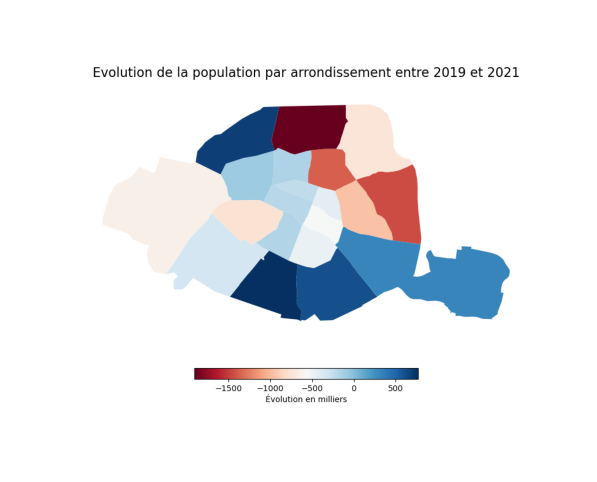

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/carte_evol_population_niveau.png"))
plt.axis("off")
print("Carte 1 - Evolution de la population par arrondissement entre 2019 et 2021")

Le diagnostic de l'évolution des effectifs est complété par celui de l'évolution de la population en pourcentage, laquelle donne une meilleure approche de l'intensité de l'évolution démographique à Paris. On observe ainsi que les arrondissements qui gagnent relativement moins d'habitants - au maximum +1,5% - que ceux qui en perdent dont la population a pu baissé jusqu'à 5% sur la période (Graphique 1). 

Les arrondissements du centre parisiens, pourtant les moins concernés par une baisse absolue de la population, sont en réalité parmi les arrondissements les plus touchés en proportion du nombre de leurs habitants (Carte 2). Cette baisse relative est d'autant plus parlante  que ces arrondissements soient d'une superficie plus faibles que ceux du Nord : la perte en habitants y est donc d'une plus grande intensité. 

Graphique 1 - Evolution de la population par arrondissement entre 2019 et 2021, avec contribution de 2020


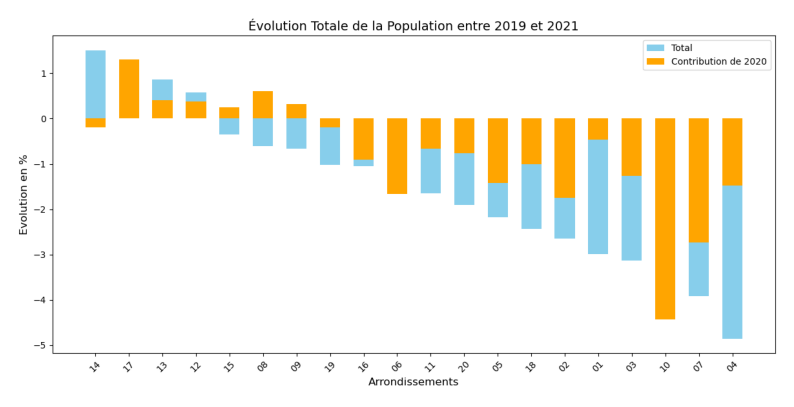

In [10]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/evolution_population_avec_contrib.png"))
plt.axis("off")
print("Graphique 1 - Evolution de la population par arrondissement entre 2019 et 2021, avec contribution de 2020")

Carte 2 - Evolution de la population par arrondissement entre 2019 et 2021, en pourcentage


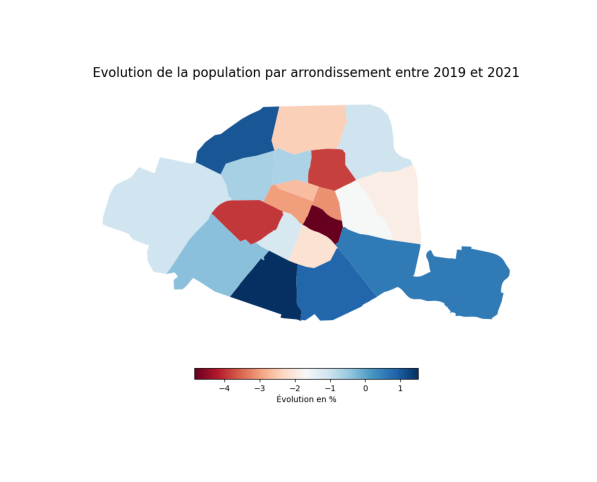

In [11]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/carte_evol_population_pourcentage.png"))
plt.axis("off")
print("Carte 2 - Evolution de la population par arrondissement entre 2019 et 2021, en pourcentage")


#### b. Focus sur la pyramide des âges 



In [18]:
os.makedirs(os.path.join(os.getcwd(), "graphs/Pyramides des âges 2019"))
os.makedirs(os.path.join(os.getcwd(), "graphs/Pyramides des âges 2020"))
os.makedirs(os.path.join(os.getcwd(), "graphs/Pyramides des âges 2021"))

In [19]:
%%capture
from scripts import stats_ages

La baisse du nombres de résidents en résidences principales n'est pas uniforme entre les classes d'âges. Dans l'ensemble, Paris a perdu entre 2019 et 2021 des enfants (0 - 11 ans ) et des personnes âgées entre 30 et 60 ans. En un sens, Paris perd des travailleurs et gagne des retraités. 

On peut noter que Paris perd des personnes en âge d'avoir des enfants (30 - 40 ans), ce qui peut être lié à la perte d'enfants par Paris. C'est plutôt sur cette population que notre analyse devrait porter

(np.float64(-0.5), np.float64(999.5), np.float64(599.5), np.float64(-0.5))

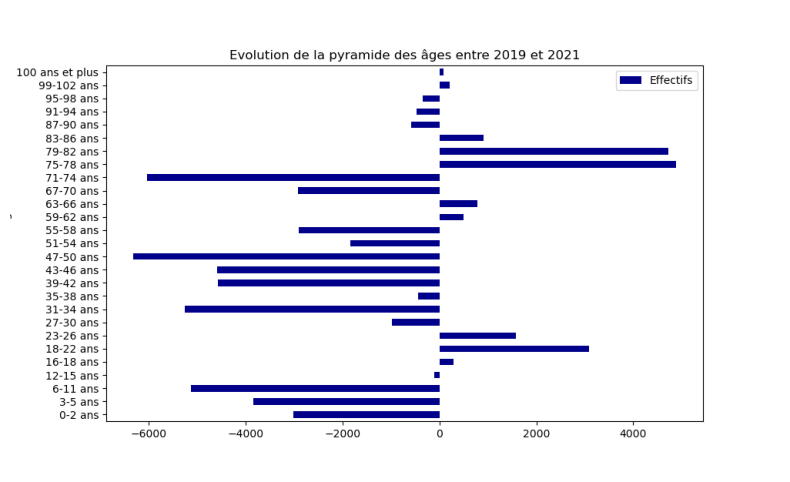

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/Pyramide_Paris_ecart1921.png"))
plt.axis("off")
print("Graphique 2 - Ecarts entre la pyramide des âges de 2021 et 2019")

Cependant les personne âgées de 27 à 38 ans demeurent les personnes les plus nombreuses à Paris en 2021 malgré cette baisse observée depuis 2019 (graphique 3). 

<Axes: title={'center': 'Pyramide des âges de Paris en 2021'}, ylabel="Tranche d'âge">

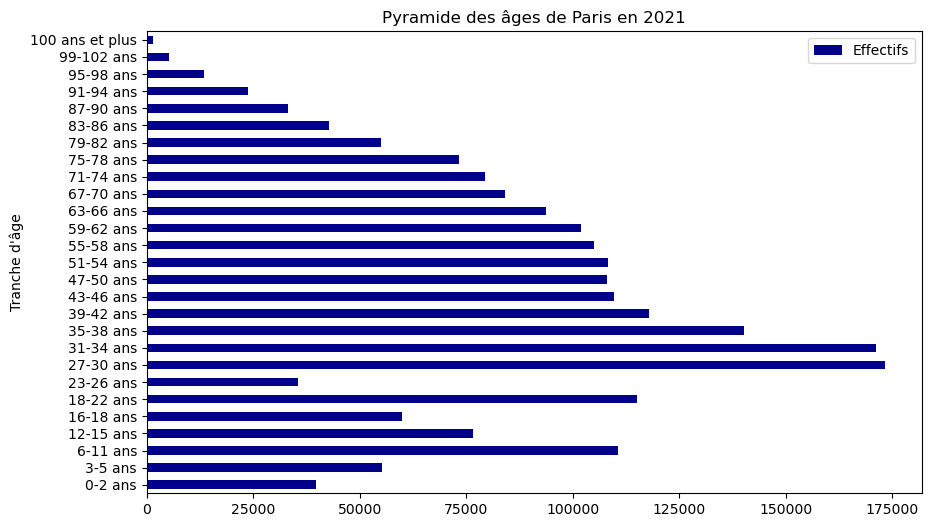

In [ ]:
pyramide_2021 = stats_ages.Pyramid_2021.to_frame(name="Effectifs")
pyramide_2021.plot(kind='barh', color='darkblue', figsize=(10, 6), title ='Graphique 3 - Pyramide des âges de Paris en 2021', ylabel = "Tranche d'âge") 

### B. L'évolution des effectifs scolaires par arrondissement entre 2019 et 2021
#### a. Au global 


In [ ]:
%%capture
from scripts import stats_descr_effectif ;

Sur la période, Paris a perdu XXX élèves (tableau 2). Cette baisse s'est accentuée en 2020 relativement à 2021 [Benoît : à vérifier]. 
La baisse s'amplifie en 2020, même s'il ne nous est pas possible de conclure sur une éventuelle causalité. Par arrondissement, la baisse se confirme mais est d'intensité variable d'une année sur l'autre (graphique 4). 

In [ ]:
print("Tableau 2 - la baisse du nombre d'élèves entre 2019 et 2021")
print(stats_descr_effectif.table_pertes_df)

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/evolution_effectif_avec_contrib.png"))
plt.axis("off")
print("Graphique 4 - Baisse du nombre d'élèves, avec contribution de 2020")

La vue schématique par carte est plus parlante : contrairement à l'évolution tantôt positive tantôt négative de la population par arrondissement, ici tous les arrondissements ont perdu des élèves entre 2019 et 2021. 

Le diagnostic d'une perte de population plus forte pour les arrondissements du nord-est parisien se retrouve aussi pour la population scolaire même si les effectifs scolaires n'évoluent pas exactement de la même manière que la population totale. Ces évolutions sont du même ordre de grandeur : c'est principalement le Nord est parisien qui perd à la fois des habitants et des élèves (ici jusqu'à 12% de perte d'effectifs scolaires sur la période [Benoît : est-ce qu'on peut avoir le chiffre dans un tableau ?]). 

Cette tendance s'observe également dans les arrondissements du centre. La baisse du niveau des effectifs est moins importante pour ces arrondissements que pour les autres (carte 2). Néanmoins la baisse relative est plus importante que pour les autres, à l'exception des arrondissements du nord est (carte 3). 

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/carte_evol_effectifs_niveau.png"))
plt.axis("off")
print("Carte 2 - La baisse des effectifs scolaire entre 2019 et 2021, en niveau")

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/carte_evol_effectifs_pourcentage.png"))
plt.axis("off")
print("Carte 3 - La baisse des effectifs scolaire entre 2019 et 2021, en pourcentage")

## 4. Modelisation 

On cherche donc à modéliser l'évolution des effectifs scolaires sur la période, et à tenter de trouver des variables corrélées à cette variable d'intérêt. 
Notre démarche est avant tout exploratoire et n'a pas vocation à trouver un cadre causale robuste, comme par exemple une expérience randomisée. Il s'agit avant tout de vérifier si quelques variables explicatives ont un quelconque pouvoir prédictif.

De prime abord, on peut considérer que la population d'intérêt est celle des 30 - 40 ans, la plus probable d'avoir fondée une famille et d'avoir des enfants sur la période précédente. En outre, le logement est une question centrale pour les familles, l'arrivée d'un enfant rendant impérieuse la question d'une pièce supplémentaire pour le couple. Pour ces deux variables, il serait raisonnable de s'attendre à un effet positif.
L'âge moyen du premier enfant et le nombre d'enfant par femme est décroissant du niveau d'études. Paris étant la ville concentrant le plus grand nombre de diplomes de niveau élevés, il est possible que cette proportion joue négativement sur le nombre d'élèves futurs.

Ceci nous conduit à étudier le modèle linéaire du niveau de l'effectif scolaire de chacun des arrondissements lors trois années différentes sur le niveau des variables suivantes :
$$
effectifs\_scolaires _{i,t} = \alpha + \beta_1 \times prop\_T3_{i,t} + \beta_2 \times prop\_bac\_plus5_{i,t} + \beta_3 \times prop\_30\_40\_ans_{i,t} + \gamma \times X + \epsilon_{i,t}
$$
où $prop\_T3_{i,t}$ est la proportion d'appartements de 3 pièces ou plus (T3) dans l'arrondissement, $prop\_bac\_plus5_{i,t}$ la proportion de personnes ayant un diplôme de niveau bac + 5 dans l'arrondissement, $prop\_30\_40\_ans_{i,t}$ la proportion de personnes âgées de 30 à 40 ans dans l'arrondissement. $X$ est un vecteur de variables de contrôles, notamment des variables indicatrices pour la zone dans laquelle se situe l'arrondissement : nord-est, nord-ouest, sud-est, sud-ouest. 



In [ ]:
%%capture
from scripts import regressions

En estimant chaque modèle d'abord sur chaque année de manière séparée (sans le t dans la régression présentée plus haut), on observe des résultats concordant avec ce qui était attendu. Les variables $prop\_30\_40\_ans_{i}$ et $prop\_T3_{i}$ ont bien un effet positif sur le nombre d'élèves dans l'arrondissement, et ce de manière significative. Ainsi le nombre d'élèves dans un arrondissement augmente quand la proportion de T3 et/ou la proportion de personnes âgées entre 30 et 40 ans augmentent. 

De même la variable $prop\_bac\_plus5_{i}$ a bien un effet négatif sur le nombre d'élèves dans l'arrondissement mais cet effet n'est pas significatif à aucun seuil et pour aucune année. 

In [ ]:
import pandas as pd
print("Tableau synthétic de la régression pour l'année 2019")
print(pd.DataFrame({ "Coefficients": regressions.model_2019.fit().params, "P-value": regressions.model_2019.fit().pvalues}))
print("Tableau synthétic de la régression pour l'année 2020")
print(pd.DataFrame({ "Coefficients": regressions.model_2020.fit().params, "P-value": regressions.model_2020.fit().pvalues}))
print("Tableau synthétic de la régression pour l'année 2021")
print(pd.DataFrame({ "Coefficients": regressions.model_2021.fit().params, "P-value": regressions.model_2021.fit().pvalues}))

In [ ]:
%%capture
from scripts import regressions_effectifs

In [ ]:
import pandas as pd
print(pd.DataFrame({ "Coefficients": regressions_effectifs.model_effectifs_absolus.fit().params, "P-value": regressions_effectifs.model_effectifs_absolus.fit().pvalues}))

On observe d'après les résultats suivants que la proportion d'adultes âgés de 30 à 40 ans a un impact positif et significatif sur les effectifs scolaires, tout comme la proportion d'appartements de 3 pièces ou plus. Cela signifie que si la proportion d'adultes âgés de 30 à 40 ans augmente dans l'arrondissement, les effectifs scolaires augmentent. Or on sait que le nombre d'adultes âgés de 30 à 40 ans a diminué à Paris sur la période étudiée, ce qui indique le sens de variation des effectifs scolaires constaté entre 2019 et 2021. 

In [ ]:
print(pd.DataFrame({ "Coefficients": regressions_effectifs.model_effectifs_absolus_zone.fit().params, "P-value": regressions_effectifs.model_effectifs_absolus_zone.fit().pvalues}))

`Je ne sais pas quelles régressions il est utile de mettre et de commenter`

In [ ]:
%%capture
from scripts import regressions_ratios

In [ ]:
import pandas as pd
print(pd.DataFrame({ "Coefficients": regressions_ratios.model_avec_ratios.fit().params, "P-value": regressions_ratios.model_avec_ratios.fit().pvalues}))

## 5. Conclusion


`Conclusion à faire`